# Graphs

## Requirements

In [ ]:
!pip install seaborn pandas pandas-profiling[notebook]

In [2]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

## Data

In [3]:
df = pd.read_csv("./dataset/out/summary.csv")
df[df["ner"]=="nametag"]["features"].describe()

count     95.000000
mean      69.642105
std      119.203109
min        2.000000
25%       14.000000
50%       32.000000
75%       84.000000
max      994.000000
Name: features, dtype: float64

In [4]:
df.drop(columns=["test-name", "features"]).groupby("ner").describe().T

ner                nametag  nametag_plus        nltk    nltk_plus       spacy  \
exact   count    95.000000     95.000000   95.000000    95.000000   95.000000   
        mean     34.442105     49.463158   29.884211    38.989474   29.200000   
        std      66.092410     83.407971   54.305453    61.771111   40.655690   
        min       2.000000      2.000000    0.000000     0.000000    0.000000   
        25%       9.000000     11.000000    6.000000     7.000000    5.000000   
        50%      15.000000     20.000000   12.000000    15.000000   12.000000   
        75%      34.000000     53.000000   37.000000    48.500000   40.000000   
        max     592.000000    690.000000  481.000000   486.000000  220.000000   
inside  count    95.000000     95.000000   95.000000    95.000000   95.000000   
        mean      4.336842      4.926316    1.894737     2.178947    3.652632   
        std      17.072194     21.892018    3.375360     4.065891    5.048211   
        min       0.000000      0.000000    0.000000     0.000000    0.000000   
        25%       0.000000      0.000000    0.000000     0.000000    1.000000   
        50%       1.000000      1.000000    1.000000     1.000000    2.000000   
        75%       3.000000      3.000000    2.000000     2.000000    5.000000   
        max     164.000000    212.000000   19.000000    28.000000   34.000000   
partial count    95.000000     95.000000   95.000000    95.000000   95.000000   
        mean      1.147368      4.863158    1.084211    11.210526    1.189474   
        std       1.804064     11.787670    2.508128    56.668858    1.746088   
        min       0.000000      0.000000    0.000000     0.000000    0.000000   
        25%       0.000000      0.000000    0.000000     0.000000    0.000000   
        50%       1.000000      1.000000    0.000000     0.000000    1.000000   
        75%       2.000000      3.000000    1.000000     2.500000    2.000000   
        max      10.000000     89.000000   19.000000   474.000000    8.000000   
lines   count    95.000000     95.000000   95.000000    95.000000   95.000000   
        mean     88.315789    216.378947   44.263158    93.010526   93.884211   
        std     178.744812    513.447364   85.460481   244.967106  119.043338   
        min       3.000000      3.000000    1.000000     1.000000    4.000000   
        25%      15.000000     18.000000    9.000000    10.000000   18.500000   
        50%      30.000000     42.000000   19.000000    24.000000   37.000000   
        75%     111.000000    245.500000   55.500000    85.000000  134.000000   
        max    1576.000000   4122.000000  772.000000  2120.000000  570.000000   

ner             spacy_plus  
exact   count    95.000000  
        mean     45.242105  
        std      75.749267  
        min       0.000000  
        25%       6.500000  
        50%      18.000000  
        75%      56.000000  
        max     563.000000  
inside  count    95.000000  
        mean      3.726316  
        std       5.089501  
        min       0.000000  
        25%       1.000000  
        50%       2.000000  
        75%       5.000000  
        max      34.000000  
partial count    95.000000  
        mean      1.789474  
        std       3.052361  
        min       0.000000  
        25%       0.000000  
        50%       1.000000  
        75%       2.000000  
        max      22.000000  
lines   count    95.000000  
        mean    146.484211  
        std     227.459319  
        min       4.000000  
        25%      19.000000  
        50%      50.000000  
        75%     210.000000  
        max    1577.000000

In [5]:
min_feat = 20
df[df["features"] > min_feat].describe()

,features,exact,inside,partial,lines
count,384.000000,384.000000,384.000000,384.000000,384.000000
mean,97.937500,53.348958,4.651042,5.166667,163.265625
std,135.860804,74.805915,14.325500,28.974885,319.562449
min,21.000000,3.000000,0.000000,0.000000,6.000000
25%,32.000000,15.000000,1.000000,0.000000,32.000000
50%,48.500000,30.000000,2.000000,1.000000,63.000000
75%,120.250000,65.500000,5.000000,3.000000,175.000000
max,994.000000,690.000000,212.000000,474.000000,4122.000000


## Profile

In [ ]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

## Recall
$$ \text{recall} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{\text{TP}}{\text{Total actual positive}} $$


In [7]:
# Any match
df['recall'] = (df['exact'] + df['inside'] + df['partial']) / df['features']
# Exact match
df['recall-exact'] = df['exact'] / df['features']

In [8]:
df[["recall", "recall-exact", "ner"]].groupby("ner").describe()

recall                                                    \
              count      mean       std       min       25%       50%   
ner                                                                     
nametag        95.0  0.638274  0.182997  0.263158  0.500000  0.625000   
nametag_plus   95.0  0.854370  0.133933  0.431034  0.818841  0.897959   
nltk           95.0  0.517407  0.205464  0.090909  0.388007  0.533333   
nltk_plus      95.0  0.662183  0.231318  0.090909  0.500000  0.666667   
spacy          95.0  0.518511  0.177901  0.000000  0.384671  0.529412   
spacy_plus     95.0  0.665124  0.209077  0.000000  0.531373  0.703704   

                                 recall-exact                                \
                   75%       max        count      mean       std       min   
ner                                                                           
nametag       0.779514  1.000000         95.0  0.554418  0.178720  0.200000   
nametag_plus  0.935227  1.000000         95.0  0.739183  0.156452  0.333333   
nltk          0.683300  0.954545         95.0  0.454355  0.193581  0.000000   
nltk_plus     0.864310  1.000000         95.0  0.565247  0.228069  0.000000   
spacy         0.637841  0.900000         95.0  0.404451  0.177104  0.000000   
spacy_plus    0.829710  0.968912         95.0  0.543304  0.225595  0.000000   

                                                      
                   25%       50%       75%       max  
ner                                                   
nametag       0.415230  0.555556  0.689904  1.000000  
nametag_plus  0.659864  0.770992  0.856349  1.000000  
nltk          0.337398  0.476190  0.571429  0.870968  
nltk_plus     0.441734  0.555556  0.752551  1.000000  
spacy         0.276089  0.411765  0.526585  0.748428  
spacy_plus    0.363636  0.571429  0.714822  0.909091

Text(0.5, 1.0, 'Recall (exact match)')

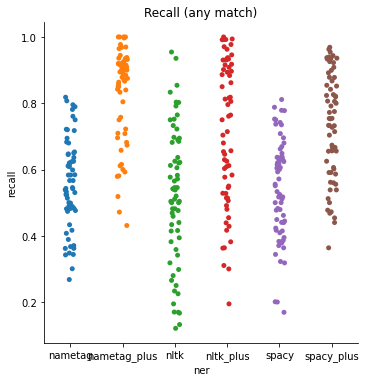

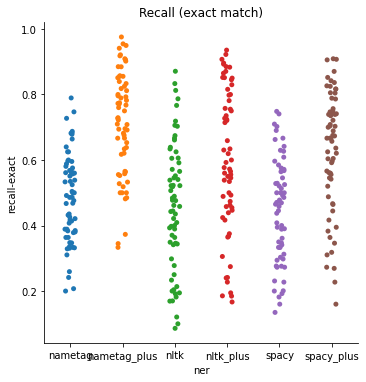

In [9]:
sns.catplot(data=df[df["features"] > min_feat], y="recall", x="ner")
plt.title('Recall (any match)')
sns.catplot(data=df[df["features"] > min_feat], y="recall-exact", x="ner")
plt.title('Recall (exact match)')

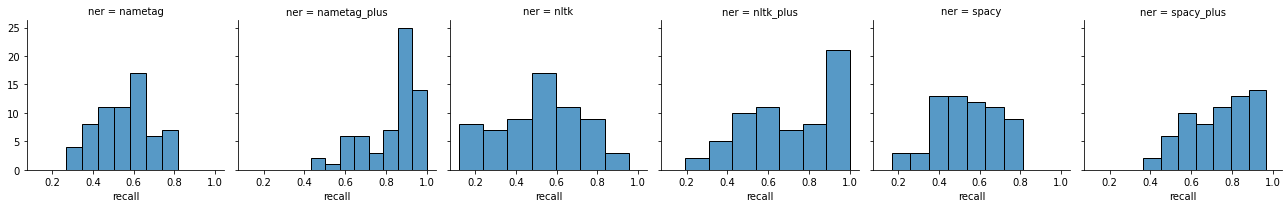

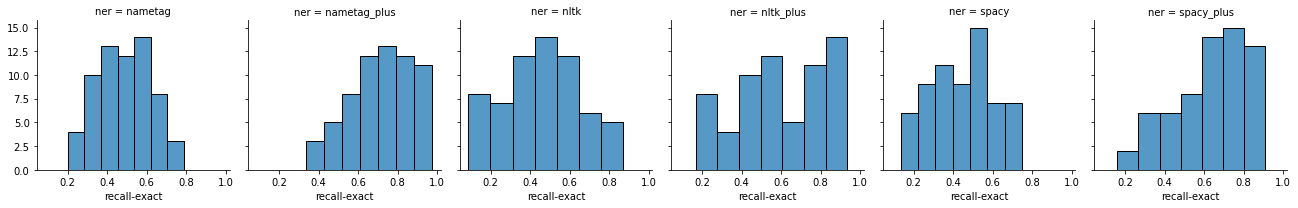

In [10]:
g = sns.FacetGrid(df[df["features"] > min_feat], col="ner")
g.map(sns.histplot, "recall")
g = sns.FacetGrid(df[df["features"] > min_feat], col="ner")
g.map(sns.histplot, "recall-exact")

<AxesSubplot:title={'center':'Recall (weighted)'}, xlabel='ner', ylabel='recall'>

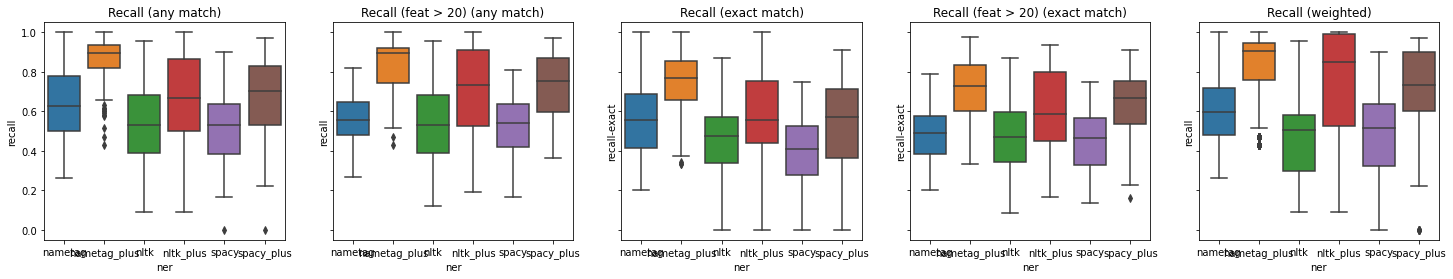

In [11]:
fig, axs = plt.subplots(ncols=5, figsize=(25,4), sharey=True)
axs[0].set_title('Recall (any match)')
sns.boxplot(data=df, x="ner", y="recall", ax=axs[0])
axs[1].set_title(f"Recall (feat > {min_feat}) (any match)")
sns.boxplot(data=df[df["features"] > min_feat], x="ner", y="recall", ax=axs[1])
axs[2].set_title('Recall (exact match)')
sns.boxplot(data=df, x="ner", y="recall-exact", ax=axs[2])
axs[3].set_title(f"Recall (feat > {min_feat}) (exact match)")
sns.boxplot(data=df[df["features"] > min_feat], x="ner", y="recall-exact", ax=axs[3])

def reindex_df(df, weights):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(weights))
    df.reset_index(drop=True, inplace=True)
    return(df)
axs[4].set_title(f"Recall (weighted)")
sns.boxplot(data=reindex_df(df, df["features"]), x="ner", y="recall", ax=axs[4])

### Full data

<AxesSubplot:xlabel='recall', ylabel='Count'>

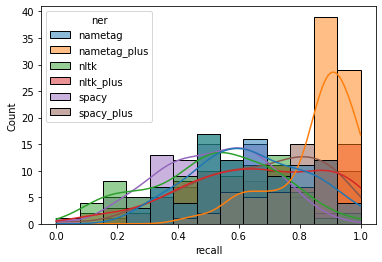

In [12]:
sns.histplot(kde=True, data=df, x="recall", hue="ner")

### Filtered data

<AxesSubplot:xlabel='recall', ylabel='Count'>

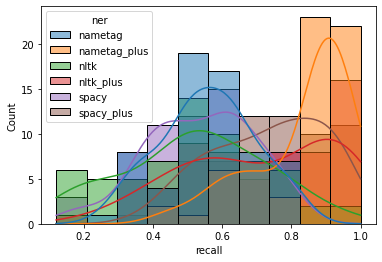

In [13]:
sns.histplot(kde=True, data=df[df["features"] > min_feat], x="recall", hue="ner")

<AxesSubplot:xlabel='recall', ylabel='Proportion'>

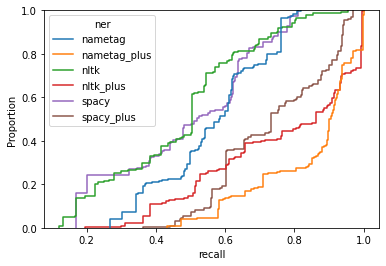

In [14]:
sns.ecdfplot(df[df["features"] > min_feat], x="recall", hue="ner", weights=df[df["features"] > min_feat]["features"])

## Precision

$$ \text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{\text{TP}}{\text{Total predicted posititive}} $$


In [15]:
df['prec'] = (df['exact'] + df['inside'] + df['partial']) / df['lines']

In [16]:
df.describe()

,features,exact,inside,partial,lines,recall,recall-exact,prec
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,69.642105,37.870175,3.452632,3.547368,113.722807,0.642645,0.543493,0.591871
std,118.678214,65.317265,11.900231,23.887449,271.712813,0.222680,0.220772,0.254569
min,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,14.000000,7.000000,0.000000,0.000000,14.000000,0.493065,0.388889,0.389706
50%,32.000000,16.000000,1.000000,1.000000,32.500000,0.646538,0.545455,0.600000
75%,85.000000,44.000000,3.000000,2.000000,111.000000,0.838333,0.709677,0.799275
max,994.000000,690.000000,212.000000,474.000000,4122.000000,1.000000,1.000000,1.200000


<AxesSubplot:title={'center':'Precision (weighted)'}, xlabel='ner', ylabel='prec'>

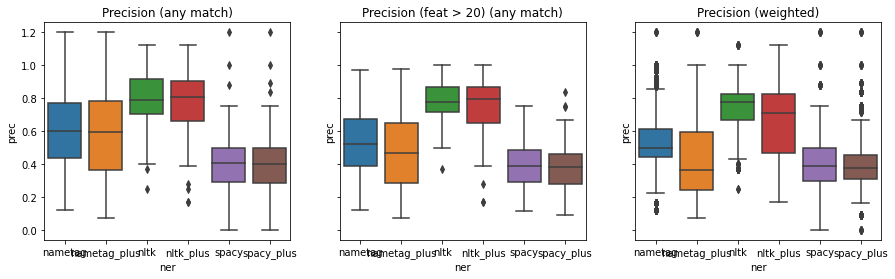

In [17]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=True)
axs[0].set_title('Precision (any match)')
sns.boxplot(data=df, x="ner", y="prec", ax=axs[0])
axs[1].set_title(f"Precision (feat > {min_feat}) (any match)")
sns.boxplot(data=df[df["features"] > min_feat], x="ner", y="prec", ax=axs[1])

def reindex_df(df, weights):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(weights))
    df.reset_index(drop=True, inplace=True)
    return(df)
axs[2].set_title(f"Precision (weighted)")
sns.boxplot(data=reindex_df(df, df["features"]), x="ner", y="prec", ax=axs[2])

## Summary


In [18]:
summary = df.groupby("ner", as_index=False).sum()
summary["recall"] = (summary["exact"] + summary["inside"] + summary["partial"] )/ summary["features"]
summary["prec"] = (summary["exact"] + summary["inside"] + summary["partial"] )/ summary["lines"]
summary["f1"] = 2 * (summary["prec"] * summary["recall"]) / (summary["prec"] + summary["recall"])
summary

,ner,features,exact,inside,partial,lines,recall,recall-exact,prec,f1
0,nametag,6616,3272,412,109,8390,0.573307,52.669729,0.452086,0.505531
1,nametag_plus,6616,4699,468,462,20556,0.850816,70.222407,0.273837,0.414324
2,nltk,6616,2839,180,103,4205,0.471886,43.163744,0.742449,0.577026
3,nltk_plus,6616,3704,207,1065,8836,0.752116,53.698444,0.563151,0.644059
4,spacy,6616,2774,347,113,8919,0.488815,38.422850,0.362597,0.416350
5,spacy_plus,6616,4298,354,170,13916,0.728839,51.613874,0.346508,0.469706


<AxesSubplot:title={'center':'f1'}, xlabel='ner', ylabel='f1'>

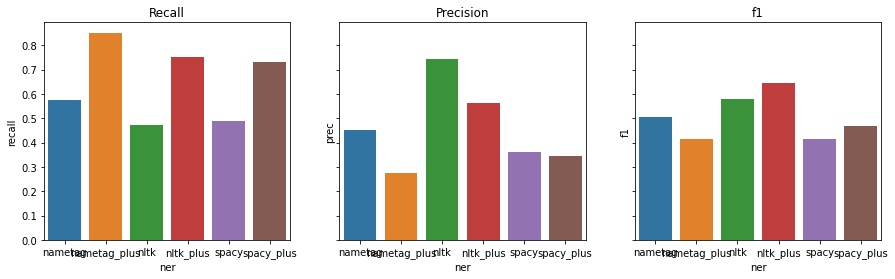

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=True)
axs[0].set_title('Recall')
sns.barplot(data=summary, x="ner", y="recall", ax=axs[0])
axs[1].set_title(f"Precision")
sns.barplot(data=summary, x="ner", y="prec", ax=axs[1])
axs[2].set_title('f1')
sns.barplot(data=summary, x="ner", y="f1", ax=axs[2])

### Tokenization

In [20]:
summary["missing"] = summary["features"] - (summary["exact"] + summary["inside"] + summary["partial"])
summary[["ner", "exact", "inside", "partial", "missing"]]

,ner,exact,inside,partial,missing
0,nametag,3272,412,109,2823
1,nametag_plus,4699,468,462,987
2,nltk,2839,180,103,3494
3,nltk_plus,3704,207,1065,1640
4,spacy,2774,347,113,3382
5,spacy_plus,4298,354,170,1794


array([<AxesSubplot:ylabel='nametag'>,
       <AxesSubplot:ylabel='nametag_plus'>, <AxesSubplot:ylabel='nltk'>,
       <AxesSubplot:ylabel='nltk_plus'>, <AxesSubplot:ylabel='spacy'>,
       <AxesSubplot:ylabel='spacy_plus'>], dtype=object)

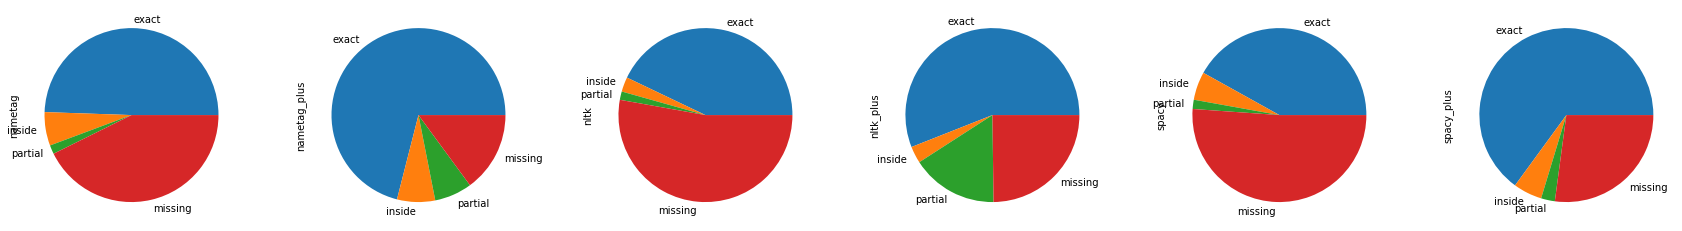

In [21]:
rows = summary.shape[0]
summary.set_index("ner")[["exact", "inside", "partial", "missing"]].T.plot.pie(subplots=True, figsize=[5*rows,4], legend=False)